# **Dimensionality reduction for gene expression of cancer RNA sequence**

<hr />

In this assignment, you are going to use tools such as PCA and t-SNE to reduce the dimensions and visualise the gene expression of cancer RNA sequence. Also use the output, after reducing dimension, to find the cluster of cancer tumors. 

In this assignment, tasks are as follows:
1. Read the dataset using Pandas library.
2. Convert to numpy array for further use.
3. Find PCA using SVD.
4. Perform PCA using sklearn library.
5. Fit t-SNE model to both PCA output.




[TOTAL POINTS: 00]



In [0]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [0]:
n_samples=1500

blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

## **Importing the necessary libraries**



*   [pandas](https://pandas.pydata.org/) : Library for reading, analyzing and manupulating datas stored in a csv file

*   [numpy](https://numpy.org/doc/): Library for N-dimensional array.

*   [sklearn](https://scikit-learn.org/stable/): Library containing machine learning algorithm. It has built-in fuction for PCA and t-SNE.

*   [matplotlib](https://matplotlib.org/): Library containing packages for visualisation.


*   [scipy](): Scientific library containing svds function for singular value decompositon calculation.

*   [tarfile](https://docs.python.org/3/library/tarfile.html): Library for reading and writing tar file.

In [0]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.sparse.linalg import svds
import seaborn as sns
import matplotlib.pyplot as plt
import tarfile

# **Dataset Description**

For this assignment, we are going to use dataset of gene expression of cancer RNA sequence. Originally the dataset is hosted at [synapse](https://www.synapse.org/). But, for this assignment, we are going to extract dataset from [UCI](https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq). The dataset contains gene expression of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and PRAD. 

**Number of attributes**: 20531

**Number of instances**: 801

We are going to download dataset using `wget` command. The dataset is in tar.gz format. So, we will use `tarfile` library to extract csv files from it. We will use `pandas` library to read csv files.

In [0]:
!wget -O output.tar.gz https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz

!tar -xzvf output.tar.gz

--2020-04-27 08:08:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72856320 (69M) [application/x-httpd-php]
Saving to: ‘output.tar.gz’

output.tar.gz       100%[===================>]  69.48M  35.1MB/s    in 2.0s    

2020-04-27 08:08:47 (35.1 MB/s) - ‘output.tar.gz’ saved [72856320/72856320]

TCGA-PANCAN-HiSeq-801x20531/
TCGA-PANCAN-HiSeq-801x20531/data.csv
TCGA-PANCAN-HiSeq-801x20531/labels.csv


In [0]:
data = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/data.csv', delimiter=',',index_col=0)
print('data shape: ',data.shape)
labels = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/labels.csv', delimiter=',')
print('label shape: ',labels.shape)

data shape:  (801, 20531)
label shape:  (801, 2)


In [0]:
x=pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/data.csv', delimiter=',',index_col=0)


In [0]:
as

In [0]:
data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.0,0.0,0.0,0.0,0.591871,5.619994,1.334282,0.000000,9.796088,0.0,0.000000,1.598651,7.215116,10.839070,6.620204,9.513538,0.0,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.0,9.833458,0.000000,...,9.370304,10.362393,5.589928,8.141964,0.000000,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.0,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.0,0.0,0.0,0.0,0.000000,11.055208,3.562621,0.000000,10.070470,0.0,0.000000,0.000000,9.949812,8.522476,1.174790,4.926991,0.0,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.0,9.533302,0.811142,...,8.882967,9.898199,7.069401,7.186134,0.000000,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.0,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.0,0.0,0.0,0.0,1.683023,8.210248,4.195285,3.660427,8.970920,0.0,0.000000,0.796598,6.096650,9.861616,7.680507,3.119439,0.0,0.452595,7.899526,0.000000,10.731098,6.967883,0.452595,0.0,9.646323,0.452595,...,10.355637,10.423274,5.170201,6.194260,0.000000,3.677147,6.271990,7.089816,9.675220,0.000000,4.224017,8.020402,6.967883,5.014445,8.400038,7.527555,0.000000,4.997902,0.796598,7.761132,0.0,6.820460,8.048983,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.0,0.0,0.0,0.0,1.267356,8.306317,3.573556,0.000000,8.524616,0.0,0.000000,0.000000,3.913761,9.511573,6.469165,7.029895,0.0,1.267356,6.800641,7.742714,12.659474,8.299890,0.768587,0.0,9.670731,0.434882,...,10.074382,9.918261,7.117924,7.196145,0.434882,3.609755,8.896696,7.577096,10.731446,5.075383,2.175652,7.675435,6.840816,6.233192,8.899886,8.319085,1.791814,5.661134,1.464093,8.625727,0.0,7.420095,7.784746,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.0,0.0,0.0,0.0,0.889707,10.149150,2.967630,0.000000,8.047238,0.0,1.435949,0.000000,1.942120,8.821535,5.861429,7.755709,0.0,0.649386,5.570241,2.612801,13.556734,8.004754,0.000000,0.0,9.587569,0.649386,...,10.129154,10.062303,6.911620,7.855149,0.360982,3.655810,7.255520,7.292607,10.779793,3.954001,6.991148,8.153248,7.508444,4.586531,9.152227,8.227717,0.360982,6.227104,0.649386,8.151879,0.0,6.558289,8.673708,6.505099,8.948989,7.010

In [0]:
labels['Class'].unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

# **Exercise 2: Data Preprocessing**

---

<b><div style="text-align: right">[POINTS: 00]</div></b>

Data in `data` variable needs to be in numpy array format for further processing. Also, the features in dataset are not in uniform scale. So, all the feaures need to be in some standard scale. In this exercise, you need to convert `data` variable into numpy array and use `StandardScaler` function provided by `sklearn` library to make all the features of `data` variable in same scale.



In [0]:
x=data.values
x_std = StandardScaler().fit_transform(x)

# **Exercise 3: PCA using singular value decomposition**

---

<b><div style="text-align: right">[POINTS: 00]</div></b>

PCA is obtained by finding eigenvectors associated with covariance matrix of given data matrix. Eigenvectors of covariance matrix is obtained by finding eigendecomposition of it. We know that, for a given data matrix $\mathbf{M}$, the eigenvectors associated with its covariance matrix is same as the singular vectors ($\mathbf{U}$ or $\mathbf{V}$) of the original matrix $\mathbf{M}$.

In this exercise, you need to compute `k` singular vector with the largest singular values using `svds` function provided by `scipy` library of `x_std` variable. The output of singular vector will be in ascending order. So, you need to arrange the matrix $\mathbf{U}$ or $\mathbf{V}$ in opposite order in terms of its columns. Also you need to project original standard data given in `x_std` onto the component given by singular vectors. For this, you will use dot product between `x_std` and the sorted matrix $\mathbf{U}$ or $\mathbf{V}$. The output need to be placed in variable `PCA_svd`.

In [0]:
u,s,vt = svds(x_std.T, k=4)
n=len(s)
print(u)
u[:,:n]=u[:,n-1::-1]
print(u)

[[-9.15022505e-05  2.56142427e-04  2.30786723e-03  9.79407002e-04]
 [ 9.26212709e-03 -1.45301812e-03 -6.37286650e-03 -2.35638870e-03]
 [ 5.78623751e-03 -6.02132388e-03  4.66480019e-04 -4.96579438e-03]
 ...
 [ 6.11102160e-03 -3.00220611e-03 -1.49397423e-02  2.33707519e-03]
 [-9.53220721e-03 -7.04655217e-03 -2.32062196e-03  1.95966527e-03]
 [-1.26137490e-03  2.15189328e-03  1.00492573e-03  1.04891076e-03]]
[[ 9.79407002e-04  2.30786723e-03  2.56142427e-04 -9.15022505e-05]
 [-2.35638870e-03 -6.37286650e-03 -1.45301812e-03  9.26212709e-03]
 [-4.96579438e-03  4.66480019e-04 -6.02132388e-03  5.78623751e-03]
 ...
 [ 2.33707519e-03 -1.49397423e-02 -3.00220611e-03  6.11102160e-03]
 [ 1.95966527e-03 -2.32062196e-03 -7.04655217e-03 -9.53220721e-03]
 [ 1.04891076e-03  1.00492573e-03  2.15189328e-03 -1.26137490e-03]]


In [0]:
u,s,vt = svds(x_std, k=4)
n=len(s)
v=vt.T
print(v)

# **Exercise 4: PCA using Sklearn**

---

<b><div style="text-align: right">[POINTS: 00]</div></b>

In this exercise, you are going to implemet PCA using `sklearn` library function. You wll take $100$ components. The output, after performing PCA on data given in `x_std`, is to be placed in variable `PCA_sklearn`.

In [0]:

PCA_sklearn = PCA(n_components = 100).fit_transform(x_std)

In [0]:
shape = PCA_sklearn.shape
assert(shape[0] == 800 ), 'Tesgdg'

AssertionError: ignored

In [0]:
PCA_sklearn.shape

(801, 100)

In [0]:
#pca_df = pd.DataFrame(data=pca_vis, columns=['PCA1','PCA2','g','h']).join(labels)
#pca_df = pca_df[['PCA1','PCA2','g','h','Class']]
#pca_df.head()

pca_d2 = pd.DataFrame(data=PCA_svd, columns=['PCA1','PCA2','g','h']).join(labels)
pca_d2 = pca_d2[['PCA1','PCA2','g','h','Class']]

In [0]:
pca_df.head()

,PCA1,PCA2,g,h,Class
0,-57.446987,95.410981,74.301543,-12.166781,PRAD
1,-16.919430,0.732470,-64.072900,-2.095310,LUAD
2,-70.345218,-19.303327,20.488240,48.102891,PRAD
3,-49.161591,-9.227586,61.243770,37.805741,PRAD
4,-18.132534,-51.327797,16.598116,-17.699207,BRCA


In [0]:
pca_d2.head()

,PCA1,PCA2,g,h,Class
0,12.166781,74.301543,95.410981,-57.446987,PRAD
1,2.095308,-64.072900,0.732470,-16.919430,LUAD
2,-48.102893,20.488240,-19.303327,-70.345218,PRAD
3,-37.805744,61.243770,-9.227586,-49.161591,PRAD
4,17.699201,16.598116,-51.327797,-18.132534,BRCA


Text(0.5, 1.0, 'PCA')

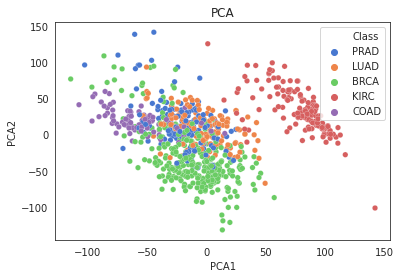

In [0]:
#pca visuallisation
palette = sns.color_palette("muted", n_colors=5)
sns.set_style("white")
sns.scatterplot(x='PCA1',y='PCA2',hue='Class',data=pca_df, palette=palette, linewidth=0.2, s=30, alpha=1).set_title('PCA')

# **Exercise 5: t-SNE using sklearn**

---

<b><div style="text-align: right">[POINTS: 00]</div></b>

In this exercise, you are going to use t-SNE algorithm using `sklearn` library. t-SNE is implemented on both the output of PCA, using svd and using `sklearn`. The output is then stored in variable `tsne_pca_svd` and `tsne_svd_sk` respectively.

In [0]:

model = TSNE(n_components = 2, random_state = 123, perplexity = 30)
tsne_pca_svd = model.fit_transform(PCA_svd)

tsne_pca_sk = model.fit_transform(PCA_sklearn)

In [0]:
plt.subplot(1,2,1, figsize=(6,4))
plt.scatter(tsne_pca_svd[:, 0], tsne_pca_svd[:, 1], c=, s=40, cmap='viridis')

plt.subplot(1,2,2, figsize=(6,4))
plt.scatter(tsne_pca_sk[:, 0], tsne_pca_sk[:, 1], c=label_predict_gmm, s=40, cmap='viridis')

In [0]:
tsne_df = pd.DataFrame(data=tsne, columns=['t-SNE1','t-SNE2']).join(labels)
tsne_df = tsne_df[['t-SNE1','t-SNE2','Class']]
tsne_df.head()

,t-SNE1,t-SNE2,Class
0,15.117081,-18.130045,PRAD
1,-18.729122,-7.249779,LUAD
2,20.508377,-29.965036,PRAD
3,19.318863,-28.580914,PRAD
4,-0.815147,22.532343,BRCA


# **Clustering using GMM**

Next, the output of t-SNE implementation will be used to find clusters using Gaussian Mixture Model(GMM). We will take $5$ components and clusters. Let's see whether GMM algorithm finds clusters and whether it groups them by tumors class given in the dataset.

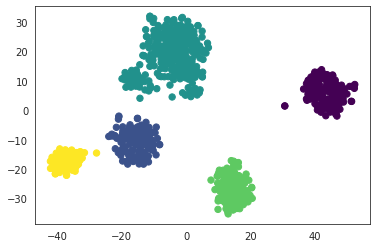

In [0]:

# Initialize gmm object with 4 components and fitted to X
gmm = GMM(n_components=5).fit(tsne)

# Generate labels for X with GMM
label_predict_gmm = gmm.predict(tsne)
# Plot the scattered datas
plt.scatter(tsne[:, 0], tsne[:, 1], c=label_predict_gmm, s=40, cmap='viridis')